<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,78.714134,75.399270,67.008882,45.127378,1246.899226,1523.148890,2095.293450,-572.144560
1,0.0,1.0,51.988740,75.481271,59.243232,30.245928,-3179.745976,-2952.786805,2957.137251,-5909.924056
2,0.0,2.0,96.420656,29.646826,65.144482,24.492459,1065.234503,1290.938925,1273.918838,17.020088
3,0.0,3.0,29.374054,67.286895,87.593798,61.102496,-797.303880,-541.946637,42.987613,-584.934250
4,0.0,4.0,25.844716,43.024493,35.654640,70.401593,-2779.726754,-2594.801312,647.013135,-3241.814447
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,52.709921,69.908688,37.772051,42.526068,-2179.410220,-1966.493492,-564.400258,-1402.093234
19996,999.0,16.0,61.769503,29.989434,75.478156,41.400491,448.847372,667.484956,1925.949182,-1258.464226
19997,999.0,17.0,28.980683,37.990728,96.828519,31.794070,571.314510,776.908510,-524.331726,1301.240236
19998,999.0,18.0,42.635111,56.438489,69.031885,31.324075,2386.320826,2595.750386,-354.433002,2950.183388


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    78.714134  75.399270  67.008882  45.127378  1246.899226   
      1.0    51.988740  75.481271  59.243232  30.245928 -3179.745976   
      2.0    96.420656  29.646826  65.144482  24.492459  1065.234503   
      3.0    29.374054  67.286895  87.593798  61.102496  -797.303880   
      4.0    25.844716  43.024493  35.654640  70.401593 -2779.726754   
...                ...        ...        ...        ...          ...   
999.0 15.0   52.709921  69.908688  37.772051  42.526068 -2179.410220   
      16.0   61.769503  29.989434  75.478156  41.400491   448.847372   
      17.0   28.980683  37.990728  96.828519  31.794070   571.314510   
      18.0   42.635111  56.438489  69.031885  31.324075  2386.320826   
      19.0   51.957081  94.242678  52.646660  22.439064 -8392.204018   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    1523.148890  2095.293450  -572.144560  
      1.0   -2952.786805  2957.137251 -5909.924056  
      2.0    1290.938925  1273.918838    17.020088  
      3.0    -541.946637    42.987613  -584.934250  
      4.0   -2594.801312   647.013135 -3241.814447  
...                  ...          ...          ...  
999.0 15.0  -1966.493492  -564.400258 -1402.093234  
      16.0    667.484956  1925.949182 -1258.464226  
      17.0    776.908510  -524.331726  1301.240236  
      18.0   2595.750386  -354.433002  2950.183388  
      19.0  -8160.918536 -1236.271358 -6924.647178  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    78.714134  75.399270  67.008882  45.127378  1246.899226   
      1.0    51.988740  75.481271  59.243232  30.245928 -3179.745976   
      2.0    96.420656  29.646826  65.144482  24.492459  1065.234503   
      3.0    29.374054  67.286895  87.593798  61.102496  -797.303880   
      4.0    25.844716  43.024493  35.654640  70.401593 -2779.726754   
...                ...        ...        ...        ...          ...   
999.0 15.0   52.709921  69.908688  37.772051  42.526068 -2179.410220   
      16.0   61.769503  29.989434  75.478156  41.400491   448.847372   
      17.0   28.980683  37.990728  96.828519  31.794070   571.314510   
      18.0   42.635111  56.438489  69.031885  31.324075  2386.320826   
      19.0   51.957081  94.242678  52.646660  22.439064 -8392.204018   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    1523.148890  2095.293450  -572.144560  
      1.0   -2952.786805  2957.137251 -5909.924056  
      2.0    1290.938925  1273.918838    17.020088  
      3.0    -541.946637    42.987613  -584.934250  
      4.0   -2594.801312   647.013135 -3241.814447  
...                  ...          ...          ...  
999.0 15.0  -1966.493492  -564.400258 -1402.093234  
      16.0    667.484956  1925.949182 -1258.464226  
      17.0    776.908510  -524.331726  1301.240236  
      18.0   2595.750386  -354.433002  2950.183388  
      19.0  -8160.918536 -1236.271358 -6924.647178  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,78.714134,75.399270,67.008882,45.127378,1246.899226,1523.148890,2095.293450,-572.144560
1,0.0,1.0,51.988740,75.481271,59.243232,30.245928,-3179.745976,-2952.786805,2957.137251,-5909.924056
2,0.0,2.0,96.420656,29.646826,65.144482,24.492459,1065.234503,1290.938925,1273.918838,17.020088
3,0.0,3.0,29.374054,67.286895,87.593798,61.102496,-797.303880,-541.946637,42.987613,-584.934250
4,0.0,4.0,25.844716,43.024493,35.654640,70.401593,-2779.726754,-2594.801312,647.013135,-3241.814447
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,52.709921,69.908688,37.772051,42.526068,-2179.410220,-1966.493492,-564.400258,-1402.093234
19996,999.0,16.0,61.769503,29.989434,75.478156,41.400491,448.847372,667.484956,1925.949182,-1258.464226
19997,999.0,17.0,28.980683,37.990728,96.828519,31.794070,571.314510,776.908510,-524.331726,1301.240236
19998,999.0,18.0,42.635111,56.438489,69.031885,31.324075,2386.320826,2595.750386,-354.433002,2950.183388


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    78.714134  75.399270  67.008882  45.127378  1246.899226   
      1.0    51.988740  75.481271  59.243232  30.245928 -3179.745976   
      2.0    96.420656  29.646826  65.144482  24.492459  1065.234503   
      3.0    29.374054  67.286895  87.593798  61.102496  -797.303880   
      4.0    25.844716  43.024493  35.654640  70.401593 -2779.726754   
...                ...        ...        ...        ...          ...   
999.0 15.0   52.709921  69.908688  37.772051  42.526068 -2179.410220   
      16.0   61.769503  29.989434  75.478156  41.400491   448.847372   
      17.0   28.980683  37.990728  96.828519  31.794070   571.314510   
      18.0   42.635111  56.438489  69.031885  31.324075  2386.320826   
      19.0   51.957081  94.242678  52.646660  22.439064 -8392.204018   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    1523.148890  2095.293450  -572.144560  
      1.0   -2952.786805  2957.137251 -5909.924056  
      2.0    1290.938925  1273.918838    17.020088  
      3.0    -541.946637    42.987613  -584.934250  
      4.0   -2594.801312   647.013135 -3241.814447  
...                  ...          ...          ...  
999.0 15.0  -1966.493492  -564.400258 -1402.093234  
      16.0    667.484956  1925.949182 -1258.464226  
      17.0    776.908510  -524.331726  1301.240236  
      18.0   2595.750386  -354.433002  2950.183388  
      19.0  -8160.918536 -1236.271358 -6924.647178  

[20000 rows x 8 columns]

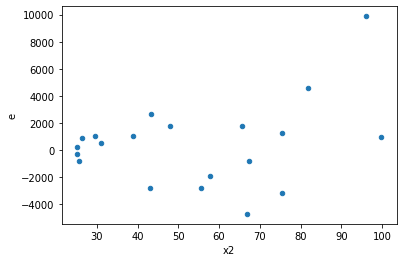

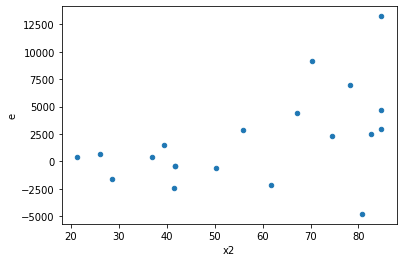

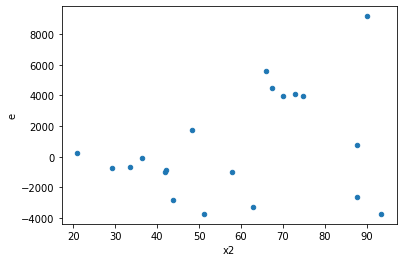

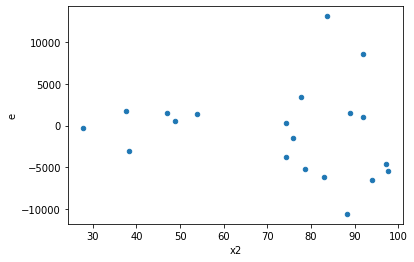

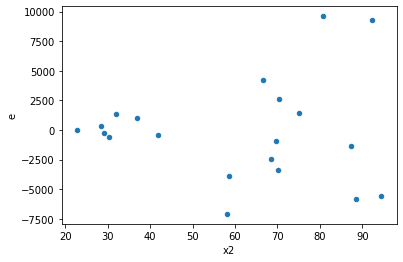

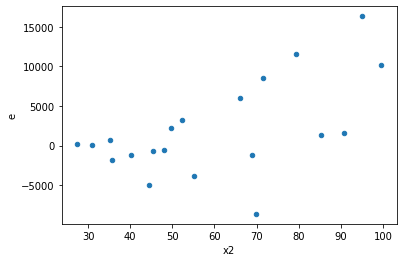

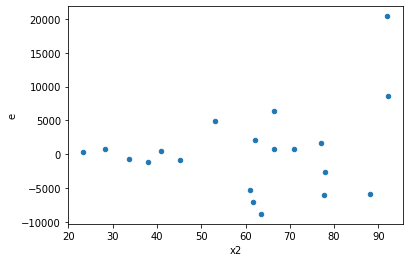

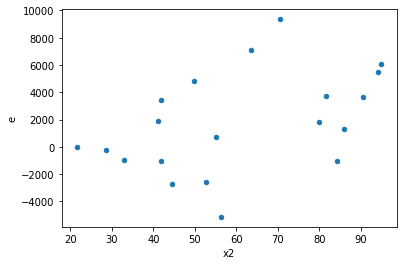

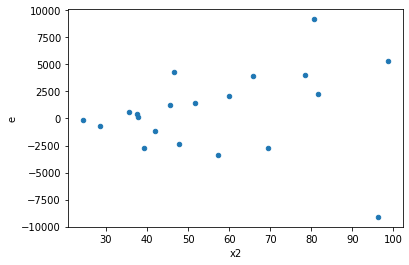

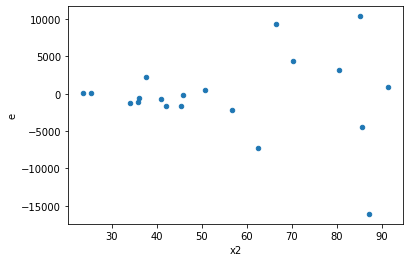

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,8.0,30475468.598259654,86381473.43887518,7618867.1495649135,10797684.179859398,1.4172296179854003,0.6239632046739627,0.6880183976630186,0.31198160233698136,Reject005=1 : Homoscedasticity
2.0,2.0,10.0,97321.6692333847,64848470.68898872,48660.83461669235,6484847.0688988725,133.26625241800406,1.2367988078132441e-07,0.9999999381600596,6.183994039066221e-08,Reject005=0 : Heteroscedasticity
3.0,2.0,10.0,8435564.038611664,436103432.43439585,4217782.019305832,43610343.243439585,10.339638948581092,0.007358754746641605,0.9963206226266792,0.0036793773733208024,Reject005=0 : Heteroscedasticity
4.0,2.0,10.0,25691228.738539986,173514296.44477117,12845614.369269993,17351429.644477118,1.3507668178165297,0.6049913740054653,0.6975043129972673,0.30249568700273266,Reject005=1 : Homoscedasticity
8.0,4.0,8.0,11776212.44048021,70466733.02112812,2944053.1101200525,8808341.627641015,2.9919098936641904,0.17507760690352892,0.9124611965482355,0.08753880345176446,Reject005=1 : Homoscedasticity
9.0,9.0,3.0,179519438.8110771,133194548.14405967,19946604.3123419,44398182.71468656,2.225851679787688,0.5520995751161788,0.7239502124419106,0.2760497875580894,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,20031170.925931253,170526536.65611115,3338528.487655209,28421089.44268519,8.513058836483536,0.01972207324457198,0.990138963377714,0.00986103662228599,Reject005=0 : Heteroscedasticity
12.0,8.0,4.0,88050811.55702762,55713360.656460576,11006351.444628453,13928340.164115144,1.2654820477237023,0.8739491509432977,0.5630254245283511,0.43697457547164886,Reject005=1 : Homoscedasticity
16.0,8.0,4.0,100946788.31953873,66640459.072860524,12618348.53994234,16660114.768215131,1.3203086533454764,0.8382701234708085,0.5808649382645957,0.41913506173540427,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,8.0,30475468.598259654,86381473.43887518,7618867.1495649135,10797684.179859398,1.4172296179854003,0.6239632046739627,Reject005=1 : Homoscedasticity
1.0,10.0,2.0,180254098.87914768,3663129.66893099,18025409.88791477,1831564.834465495,0.10161016286755717,0.008679323527268506,Reject005=0 : Heteroscedasticity
2.0,2.0,10.0,97321.6692333847,64848470.68898872,48660.83461669235,6484847.0688988725,133.26625241800406,1.2367988078132441e-07,Reject005=0 : Heteroscedasticity
3.0,2.0,10.0,8435564.038611664,436103432.43439585,4217782.019305832,43610343.243439585,10.339638948581092,0.007358754746641605,Reject005=0 : Heteroscedasticity
4.0,2.0,10.0,25691228.738539986,173514296.44477117,12845614.369269993,17351429.644477118,1.3507668178165297,0.6049913740054653,Reject005=1 : Homoscedasticity
5.0,5.0,7.0,52043446.90661896,43935899.10739171,10408689.381323792,6276557.015341672,0.6030112711984312,0.5973600085234314,Reject005=1 : Homoscedasticity
6.0,8.0,4.0,384042441.50894165,114095213.4706222,48005305.18861771,28523803.36765555,0.5941802318635958,0.49181761232348126,Reject005=1 : Homoscedasticity
7.0,4.0,8.0,121582354.28753158,60685778.76244414,30395588.571882896,7585722.345305517,0.24956655559953875,0.19594653042795973,Reject005=1 : Homoscedasticity
8.0,4.0,8.0,11776212.44048021,70466733.02112812,2944053.1101200525,8808341.627641015,2.9919098936641904,0.17507760690352892,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      596
Reject005=0 : Heteroscedasticity    404
Name: Result_test, dtype: int64